# Atmosphere transmission
Showing off the Atmosphere class by displaying the K-band.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from eniric.atmosphere import Atmosphere
%matplotlib inline

In [2]:
# Load in and display the K-band
band = "K"

In [3]:
# # Preparation scripts to run if needed
# %run "../../scripts/split_atmosphere.py -b {0}".format(band)
# %run "../../scripts/barycenter_broaden_atmmodel.py -b  {0}".format(band)

In [4]:
# Load atmosphere from band letter
atm = Atmosphere.from_band(band)

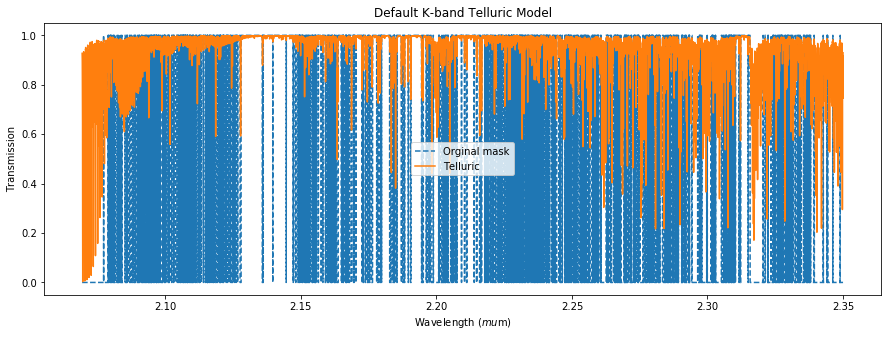

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(atm.wl, atm.mask, "--", label="Orginal mask")
plt.plot(atm.wl, atm.transmission, label="Telluric")
plt.title("Default {}-band Telluric Model".format(band))
plt.ylabel("Transmission")
plt.xlabel(r"Wavelength ($mu$m)")
plt.legend()
plt.show()

In [6]:
# Select wavelength range
atm = atm.wave_select(2.123, 2.128)

atm_org = atm.copy()  # example of using copy

- Mask Teluric lines deeper than 3%
- Barycentric expand mask to acound for yearly variation

The consecutive_test=True checks that there are 3 consecutive pixels masked out to count as a valid telluric line as the default telluric model is sampled at 3x the stellar models.

In [7]:
atm.mask_transmission(3)  # Mask telluric lines >3% deep
mask_3percent = atm.mask[:]  # Slice  copy of 3% mask

atm.barycenter_broaden(consecutive_test=True)  # Shift by barycentric motion

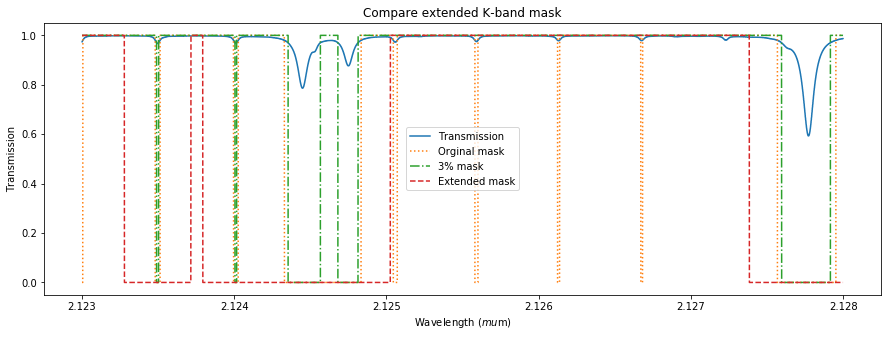

In [8]:
# Plot the new masks
plt.figure(figsize=(15, 5))
plt.plot(atm.wl, atm.transmission, label="Transmission")
plt.plot(atm.wl, atm_org.mask, ":", label="Orginal mask")
plt.plot(atm.wl, mask_3percent, "-.", label="3% mask")
plt.plot(atm.wl, atm.mask, "--", label="Extended mask")
plt.title("Compare extended {}-band mask".format(band))
plt.ylabel("Transmission")
plt.xlabel(r"Wavelength ($mu$m)")
plt.legend()
plt.show()

In [9]:
# To obtain the telluric spectra at a set of wavelength values you can use the "at" method.

# This only gets the closest transmission values in the *oversampled* telluric model.
# You may prefer or need to apply interpolation instead.
waves = [2.123, 2.1235, 2.124, 2.1245, 2.125]
new_atm = atm_org.at(waves)

assert np.allclose(new_atm.wl, waves)